In [132]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


In [133]:
dataset=pd.read_csv('Questionnaire.csv')

In [134]:
dataset.head()

,Timestamp,Patient_ID,Date,Class,Age,Gender,Blood Group,BMI,Pulse Rate,on_thyroxine,...,CRP,Creatinine,Vitamin D,Thyroid Ultrasound,thyroid scan (thyroid scintigraphy),Ferritin,Anti HCV,Bilirubin,AFP,Comment
0,9/20/2023 13:15:13,CSCR_001,9/16/2023,Normal,33,M,O+,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test is carried out by Cobas e 411
1,9/20/2023 13:53:01,CSCR_002,9/16/2023,Normal,46,F,O+,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test is carried out by Advia Centaur CP
2,9/20/2023 13:55:02,CSCR_003,9/16/2023,Normal,59,M,O+,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test is carried out by Cobas e 411
3,9/20/2023 14:01:58,CSCR_004,9/16/2023,Hypo,32,M,O+,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test is carried out by Cobas e 411
4,9/20/2023 15:17:09,CSCR_005,9/16/2023,Normal,57,F,O+,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test is carried out by Cobas e 411


In [135]:
dataset.columns

Index(['Timestamp', 'Patient_ID', 'Date', 'Class', 'Age', 'Gender',
       'Blood Group', 'BMI', 'Pulse Rate', 'on_thyroxine',
       'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery',
       'I131_treatment',
       'Have you been experiencing any of these symptoms?(check all that apply)',
       'TSH', 'FT4', 'FT3', 'T4 ', 'T3', 'Anti-TPO Ab',
       'Random Blood Sugar (RBS)', 'WBC', 'RBC', 'Platelet', 'Hb',
       'Total Cholesterol', 'Triglycerides', 'HDL Cholesterol',
       'LDL Cholesterol', 'S.IgE', 'Prolactin', 'LH', 'FSH', 'ALT', 'AST',
       'CRP', 'Creatinine', 'Vitamin D', 'Thyroid Ultrasound',
       'thyroid scan (thyroid scintigraphy)', 'Ferritin', 'Anti HCV',
       'Bilirubin', 'AFP', 'Comment'],
      dtype='object')

In [136]:
dataset.shape 

(2087, 46)

# Check No of Null values


In [137]:
dataset.isnull().sum() 

Timestamp                                                                     0
Patient_ID                                                                    0
Date                                                                          0
Class                                                                         0
Age                                                                           0
Gender                                                                        0
Blood Group                                                                 498
BMI                                                                        2086
Pulse Rate                                                                 2087
on_thyroxine                                                                538
query_on_thyroxine                                                          539
on_antithyroid_medication                                                   367
thyroid_surgery                         

In [138]:
sns.set_style('whitegrid')
#plt.figure(figsize=(10,15))

<AxesSubplot:>

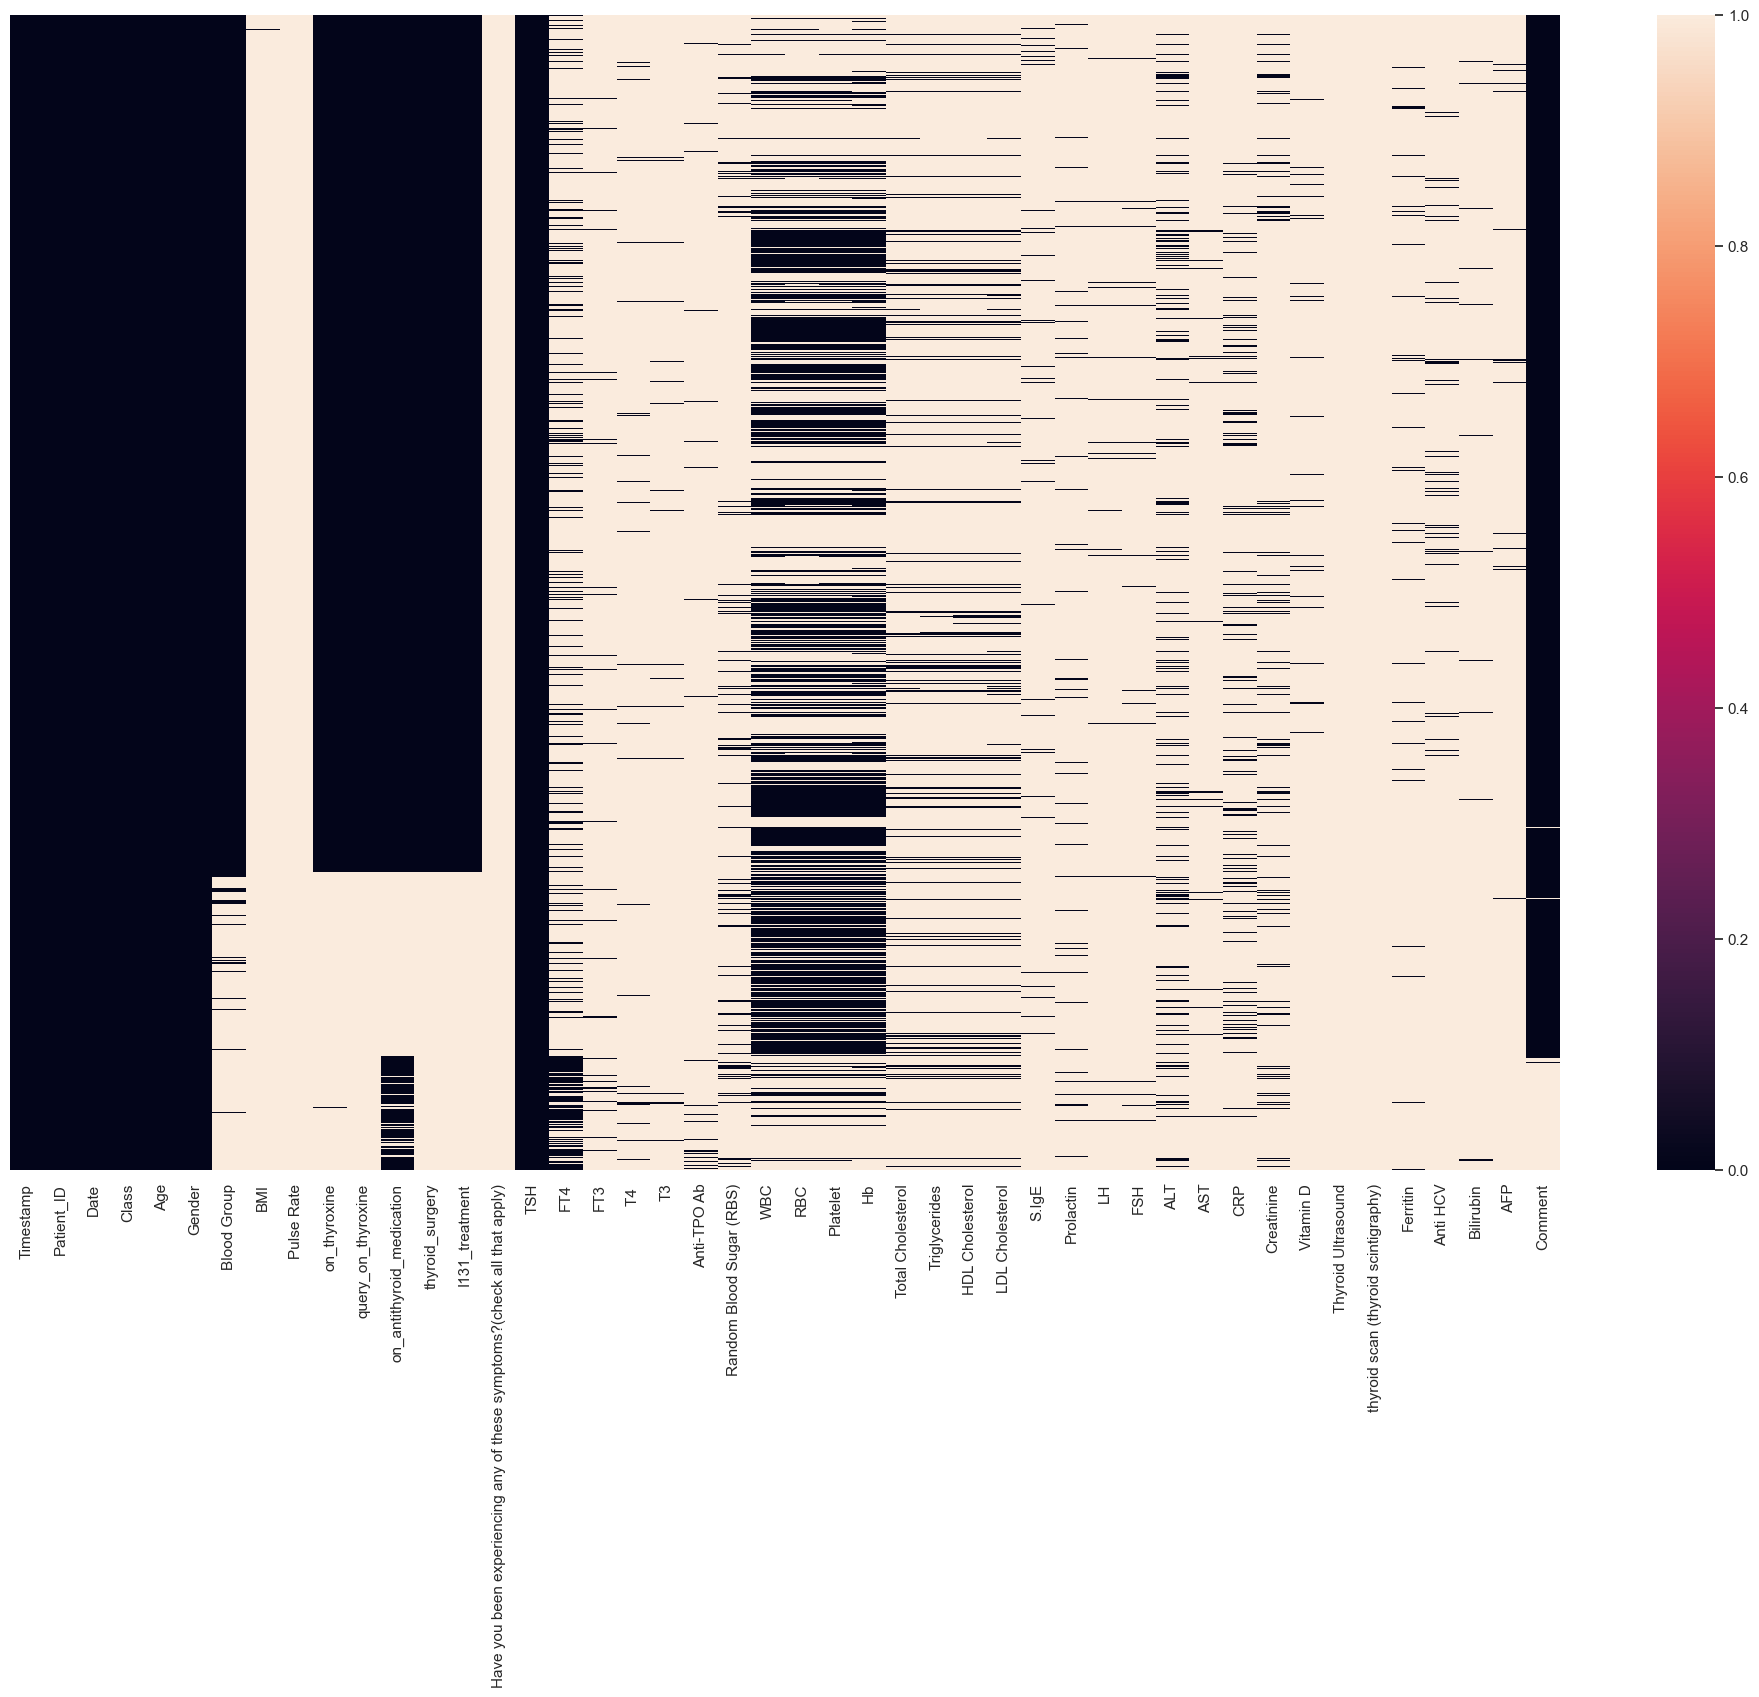

In [139]:
plt.figure(figsize=(25, 15))
sns.heatmap(dataset.isnull(), yticklabels=False)  

# Preprocess blood group using mode

In [140]:
mode_blood_group = dataset['Blood Group'].mode()[0]  

In [141]:
mode_blood_group 

'O+'

<AxesSubplot:xlabel='Blood Group', ylabel='count'>

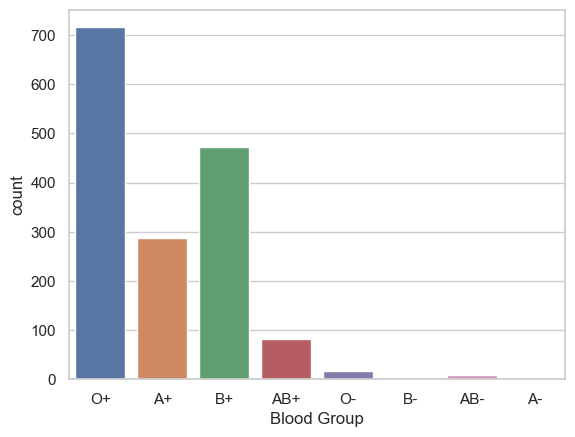

In [142]:
sns.countplot(x='Blood Group',data=dataset)

In [143]:
dataset['Blood Group'].fillna(mode_blood_group,inplace=True)   

In [144]:
dataset.isnull().sum()

Timestamp                                                                     0
Patient_ID                                                                    0
Date                                                                          0
Class                                                                         0
Age                                                                           0
Gender                                                                        0
Blood Group                                                                   0
BMI                                                                        2086
Pulse Rate                                                                 2087
on_thyroxine                                                                538
query_on_thyroxine                                                          539
on_antithyroid_medication                                                   367
thyroid_surgery                         

<AxesSubplot:xlabel='Blood Group', ylabel='count'>

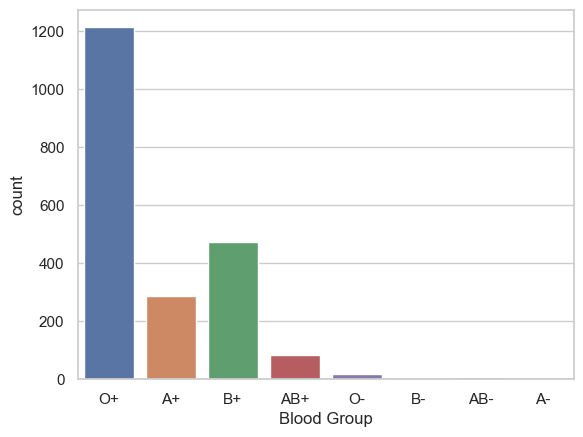

In [145]:
sns.countplot(x='Blood Group',data=dataset)

# Processing On Thyroxine data

<AxesSubplot:xlabel='on_thyroxine', ylabel='count'>

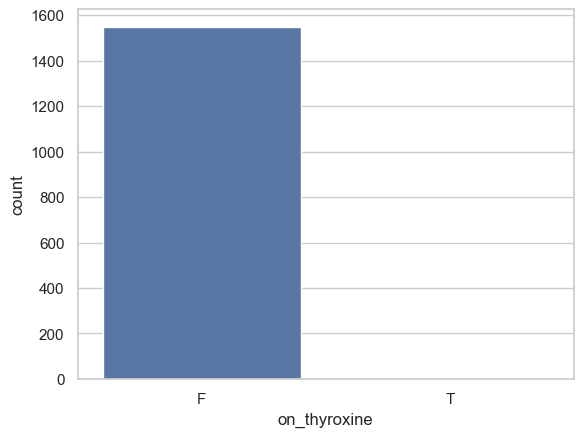

In [146]:
sns.countplot(x='on_thyroxine',data=dataset) 

In [147]:
mode_on_thyroxine=dataset['on_thyroxine'].mode()[0]

In [148]:
mode_on_thyroxine

'F'

In [149]:
dataset['on_thyroxine'].fillna(mode_on_thyroxine,inplace=True)

In [150]:
dataset['on_thyroxine'].isnull().sum()

0

# Processing query_on_thyroxine

In [151]:
dataset['query_on_thyroxine'].value_counts() 

F    1548
Name: query_on_thyroxine, dtype: int64

In [152]:
dataset['query_on_thyroxine'].fillna(dataset['query_on_thyroxine'].mode()[0],inplace=True)

In [153]:
dataset['query_on_thyroxine'].isnull().sum() 

0

#  Processing  on_antithyroid_medication

In [154]:
dataset['on_antithyroid_medication'].value_counts() 

F    1560
T     160
Name: on_antithyroid_medication, dtype: int64

In [155]:
# imputition by probabilistic approach
probability_of_f = 1560 / (1560 + 160)

# Generate random values based on the probabilities
random_values = np.random.choice(['F', 'T'], size=dataset['on_antithyroid_medication'].isnull().sum(), p=[probability_of_f, 1 - probability_of_f])

# Replace missing values with the generated random values
dataset.loc[dataset['on_antithyroid_medication'].isnull(), 'on_antithyroid_medication'] = random_values


In [156]:
dataset['on_antithyroid_medication'].value_counts() 

F    1898
T     189
Name: on_antithyroid_medication, dtype: int64

# Processing thyroid_surgery

In [157]:
dataset['thyroid_surgery'].value_counts() 

F    1548
Name: thyroid_surgery, dtype: int64

In [158]:
dataset['thyroid_surgery'].fillna('F', inplace=True)

In [159]:
dataset['thyroid_surgery'].value_counts()

F    2087
Name: thyroid_surgery, dtype: int64

# Processing I131_treatment

In [160]:
dataset['I131_treatment'].value_counts()

F    1548
Name: I131_treatment, dtype: int64

In [161]:
dataset['I131_treatment'].fillna('F', inplace=True) 

In [162]:
dataset['I131_treatment'].value_counts()

F    2087
Name: I131_treatment, dtype: int64

# Processing wbc

In [163]:
dataset['WBC'].isnull().sum() 

1091

# Convert Scientific Notation to Numeric Values 

In [164]:
import re 
def convert_scientific_notation(value):
    match = re.match(r'([\d.]+)x10\^([\d-]+)', str(value))
    if match:
        base, exponent = map(float, match.groups())
        return base * 10**exponent
    else:
        return float('nan')

# Apply the function to the 'WBC' column
dataset['WBC'] = dataset['WBC'].apply(convert_scientific_notation) 

<AxesSubplot:xlabel='Gender', ylabel='WBC'>

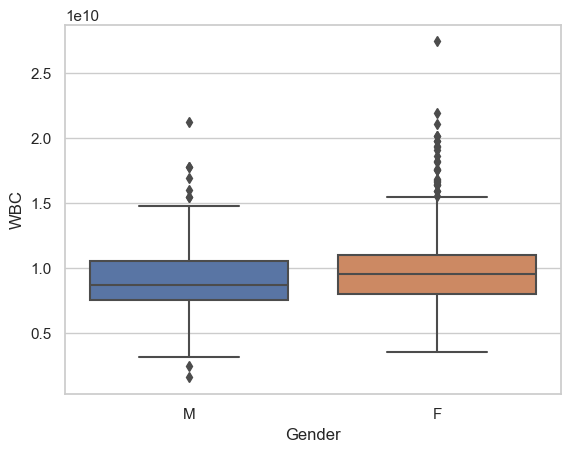

In [165]:
sns.boxplot(x='Gender', y='WBC', data=dataset) 

In [166]:
mean_wbc_male = dataset.loc[dataset['Gender'] == 'M', 'WBC'].mean()

print("Mean WBC for Gender 'M':", mean_wbc_male)

Mean WBC for Gender 'M': 9095626811.594202


In [167]:
mean_wbc_female = dataset.loc[dataset['Gender'] == 'F', 'WBC'].mean()

print("Mean WBC for Gender 'F':", mean_wbc_female) 

Mean WBC for Gender 'F': 9844441260.744986


# use predictive model linear regression to predict wbc hue is Gender

In [168]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming 'dataset' is your DataFrame
# Create a new DataFrame with non-null values for 'WBC' and 'Gender'
df_train = dataset[['WBC', 'Gender']].dropna()

# Separate the features (X) and target variable (y)
X = pd.get_dummies(df_train[['Gender']], drop_first=True)  # Convert categorical variable to numerical using one-hot encoding
y = df_train['WBC']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict 'WBC' values for rows with missing values based on 'Gender'
missing_values = dataset['WBC'].isnull()
X_missing = pd.get_dummies(dataset.loc[missing_values, ['Gender']], drop_first=True)
predicted_wbc = model.predict(X_missing)

# Fill missing values in the original DataFrame
dataset.loc[missing_values, 'WBC'] = predicted_wbc


In [169]:
dataset['WBC'].isnull().sum() 

0

<AxesSubplot:>

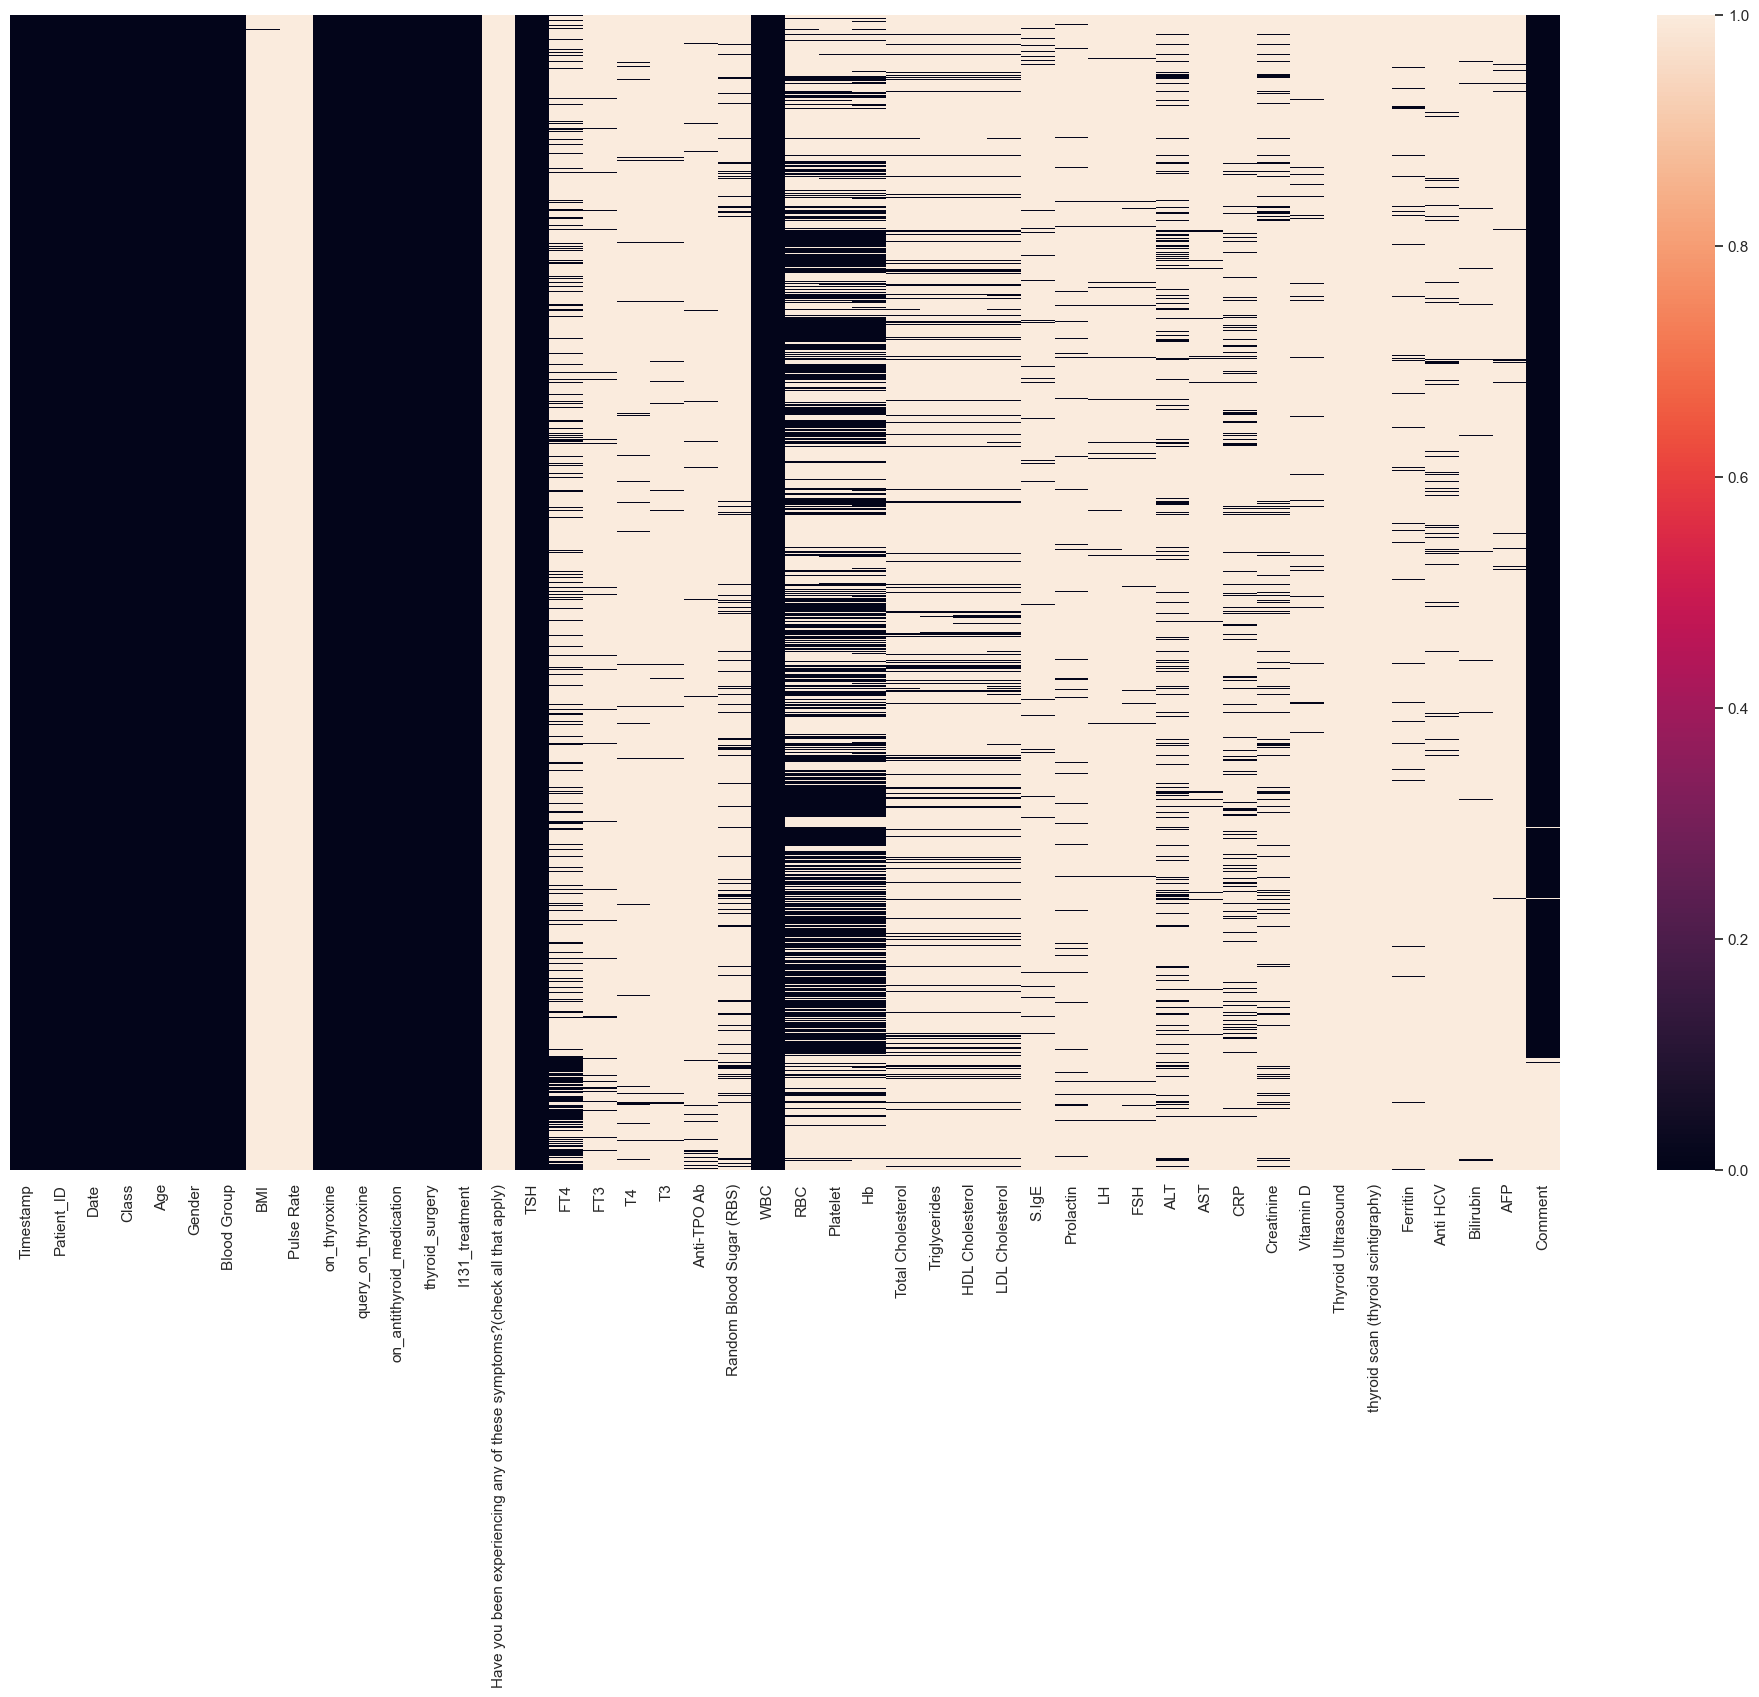

In [170]:
plt.figure(figsize=(25, 15))
sns.heatmap(dataset.isnull(), yticklabels=False) 